In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e7/sample_submission.csv
/kaggle/input/playground-series-s5e7/train.csv
/kaggle/input/playground-series-s5e7/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train=pd.read_csv('/kaggle/input/playground-series-s5e7/train.csv')
df_train.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [4]:
df_test=pd.read_csv('/kaggle/input/playground-series-s5e7/test.csv')
df_test.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [6]:
df_train.isnull().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [7]:
df_train.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


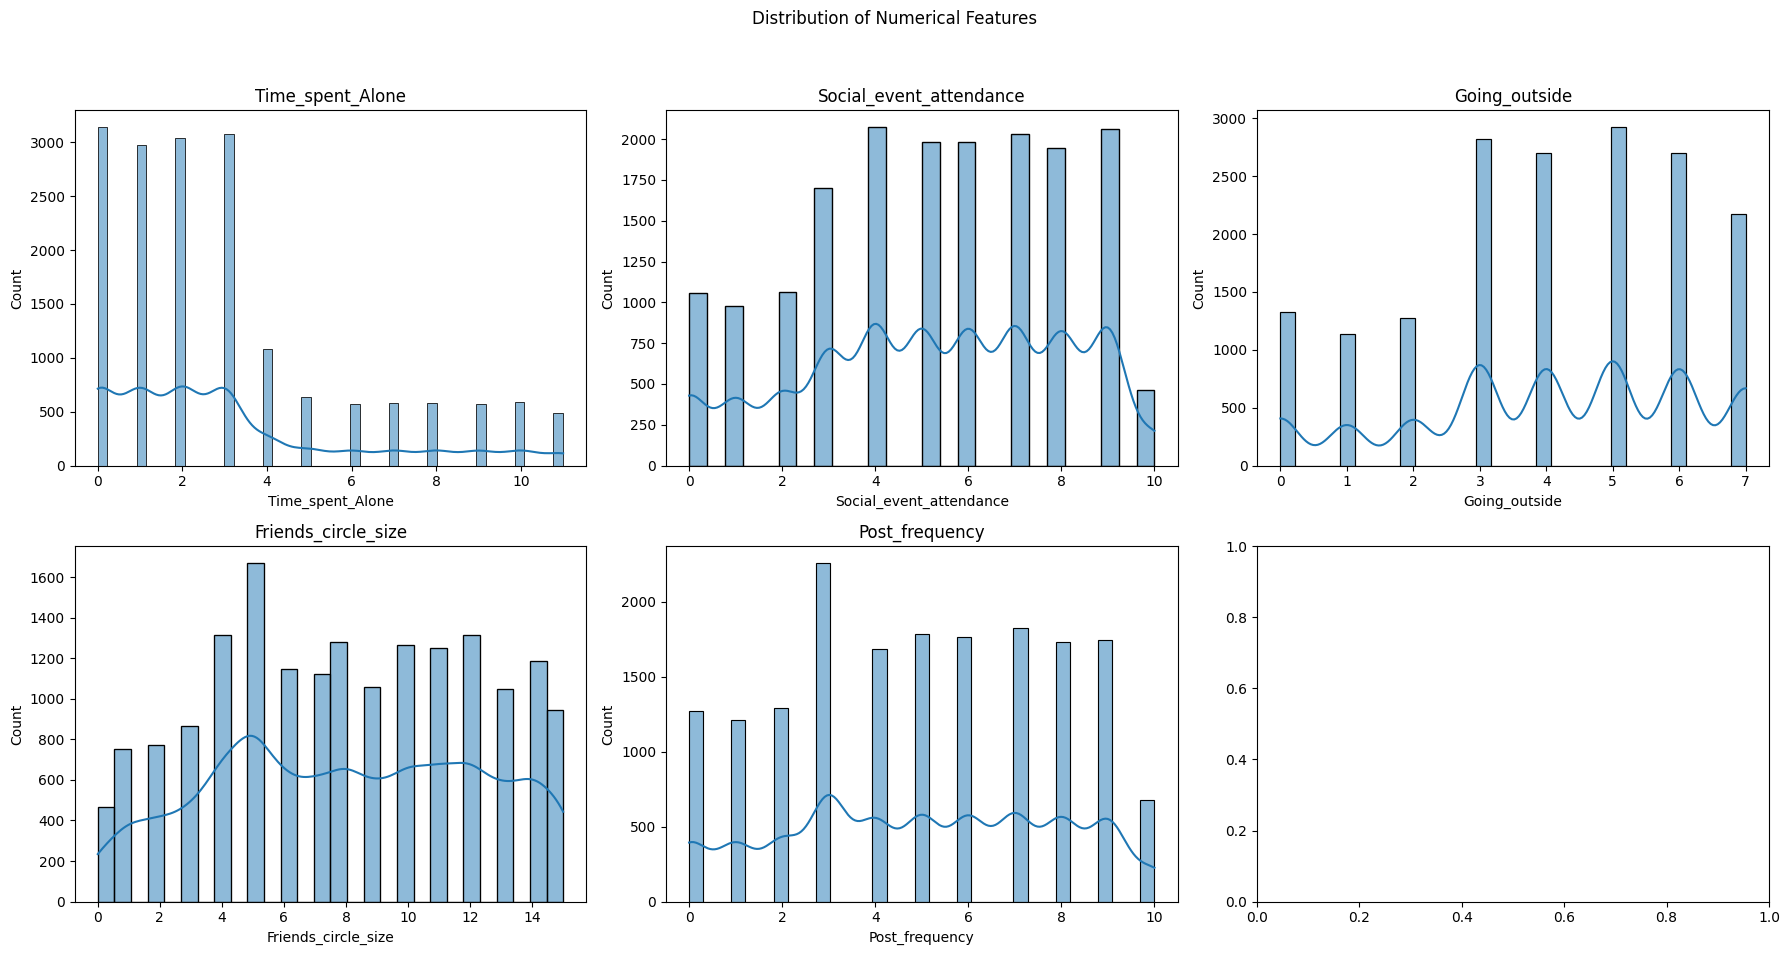

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Numerical Features')

sns.histplot(df_train['Time_spent_Alone'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Time_spent_Alone')

sns.histplot(df_train['Social_event_attendance'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Social_event_attendance')

sns.histplot(df_train['Going_outside'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Going_outside')

sns.histplot(df_train['Friends_circle_size'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Friends_circle_size')

sns.histplot(df_train['Post_frequency'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Post_frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

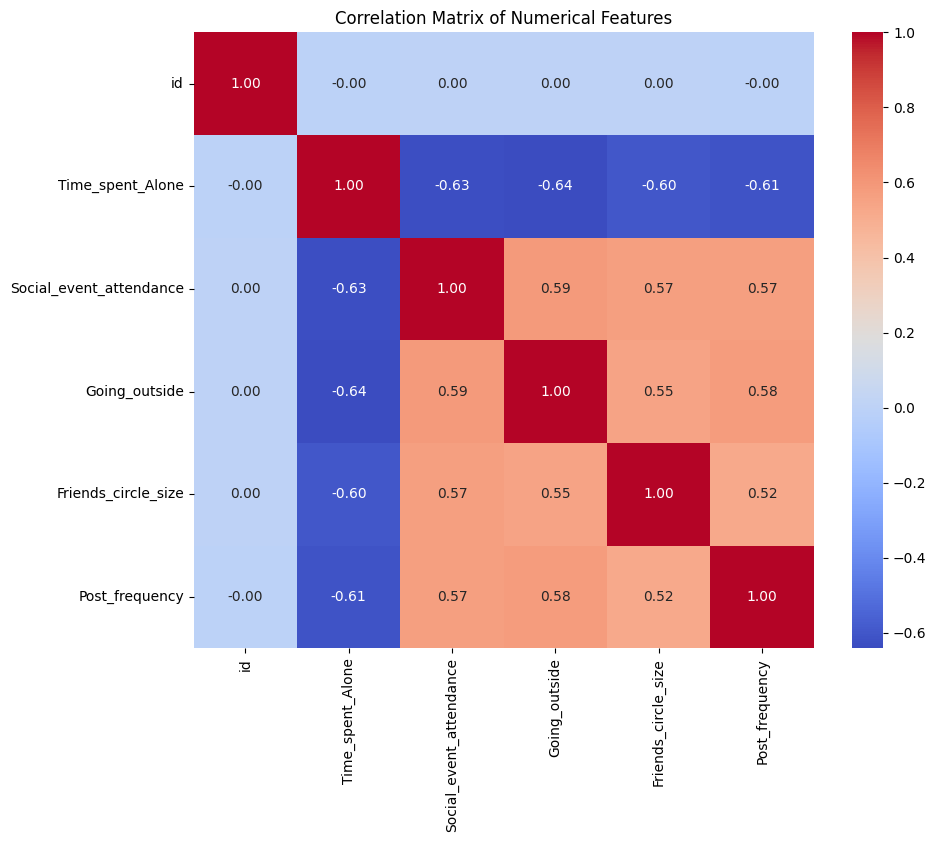

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [10]:
categorical_cols = df_train.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"Column: {col}")
    print(f"Number of unique values: {df_train[col].nunique()}")
    print("Value counts:")
    print(df_train[col].value_counts())
    print("-" * 30)

Column: Stage_fear
Number of unique values: 2
Value counts:
Stage_fear
No     12609
Yes     4022
Name: count, dtype: int64
------------------------------
Column: Drained_after_socializing
Number of unique values: 2
Value counts:
Drained_after_socializing
No     13313
Yes     4062
Name: count, dtype: int64
------------------------------
Column: Personality
Number of unique values: 2
Value counts:
Personality
Extrovert    13699
Introvert     4825
Name: count, dtype: int64
------------------------------


## Visualize categorical feature distributions

### Subtask:
Create bar plots or count plots to visualize the distribution of each categorical feature.


**Reasoning**:
Create count plots for the categorical features to visualize their distributions.



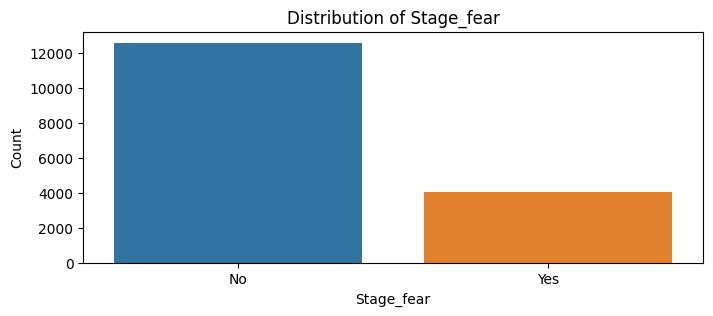

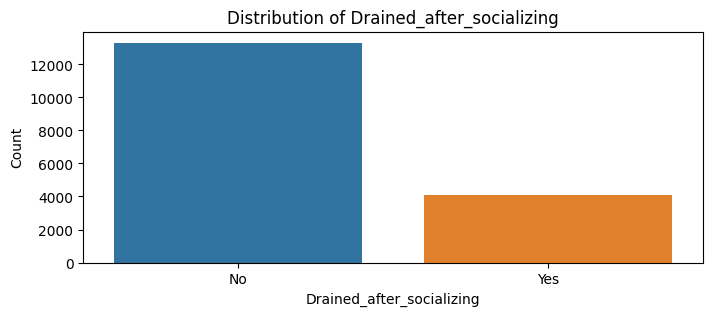

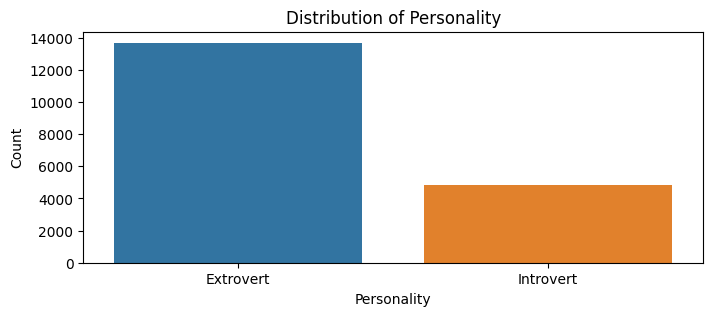

In [11]:
categorical_cols = df_train.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(8,3))
    sns.countplot(data=df_train, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## Analyze categorical features vs. target variable

### Subtask:
Use visualizations like count plots or grouped bar plots to see how categorical features relate to the 'Personality' column.


**Reasoning**:
Create count plots for each categorical feature, excluding 'Personality', to visualize their relationship with the 'Personality' column.



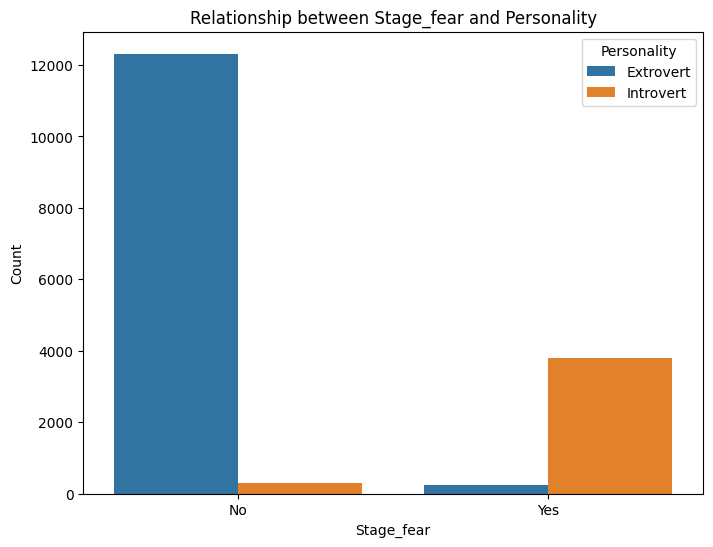

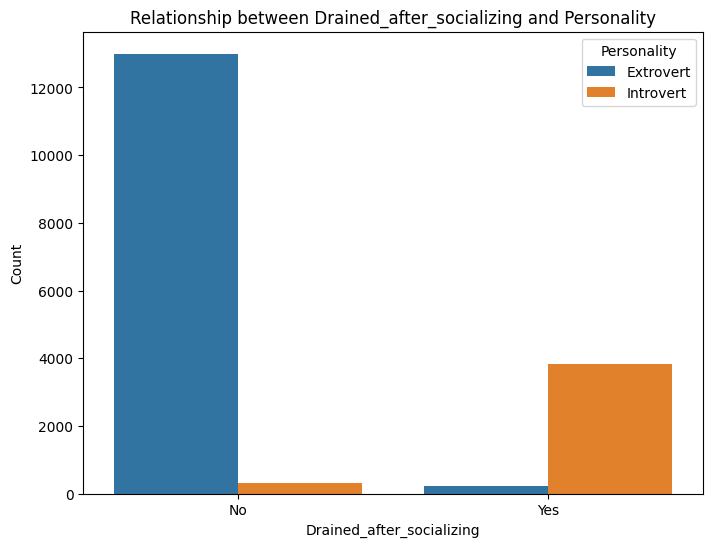

In [12]:
categorical_cols = df_train.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Personality')

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_train, x=col, hue='Personality')
    plt.title(f'Relationship between {col} and Personality')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Personality')
    plt.show()

## Explore relationships between numerical and categorical features

### Subtask:
Use box plots or violin plots to visualize the relationship between numerical features and categorical features (including the target variable).


**Reasoning**:
Create box plots for numerical features against the target variable 'Personality' and other relevant categorical features to visualize their relationships.



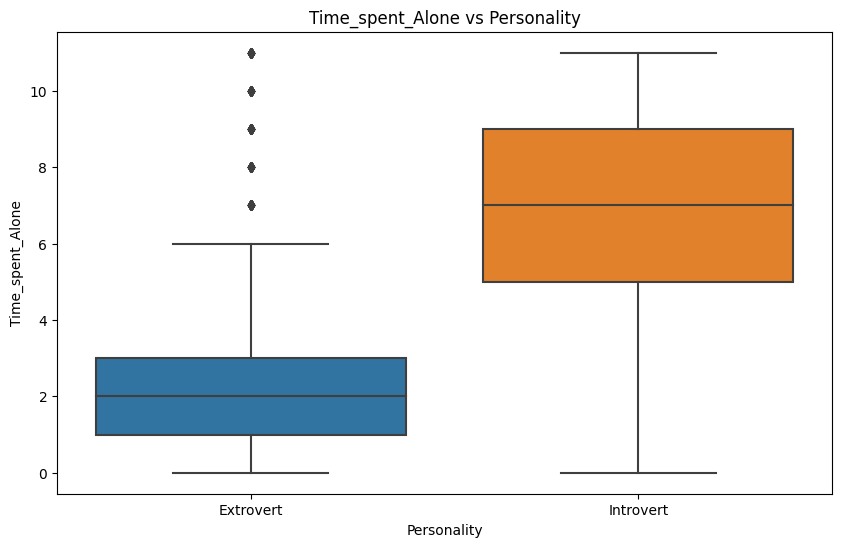

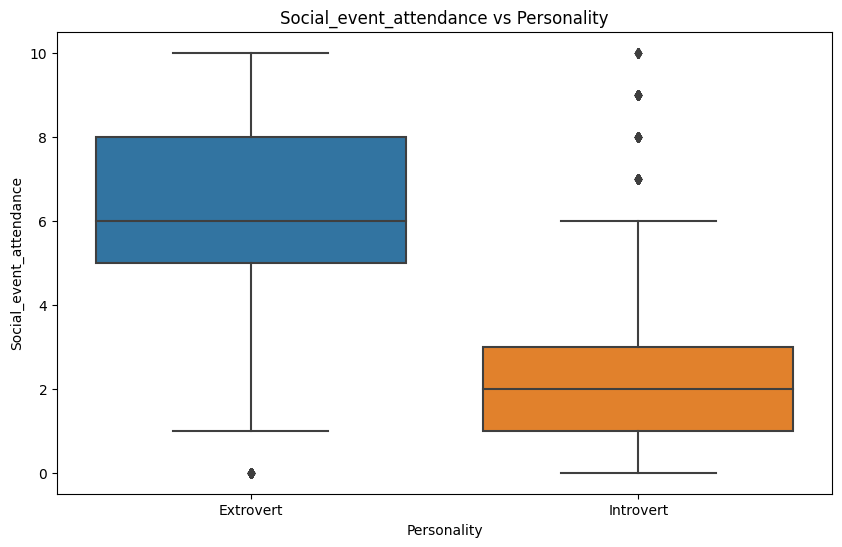

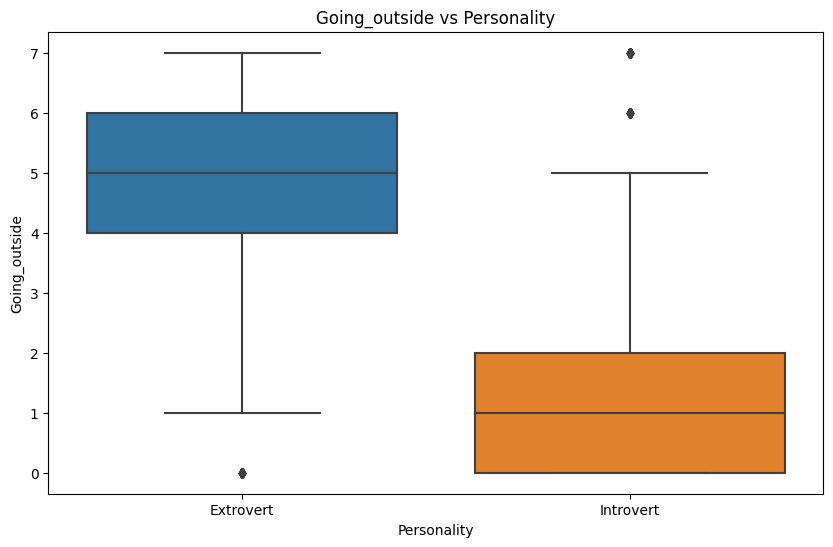

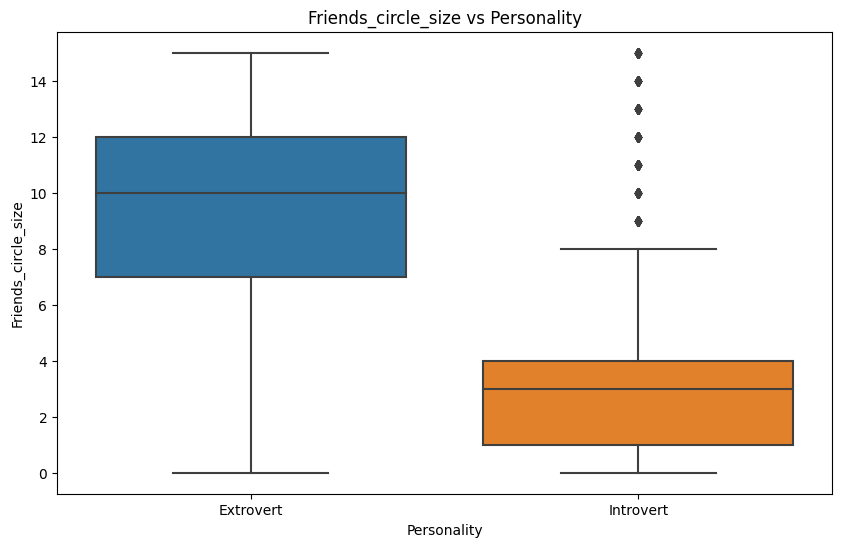

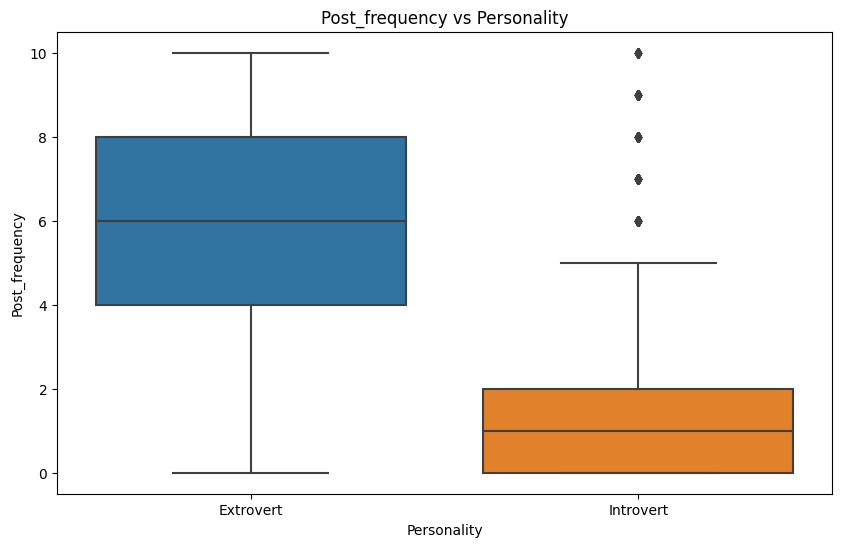

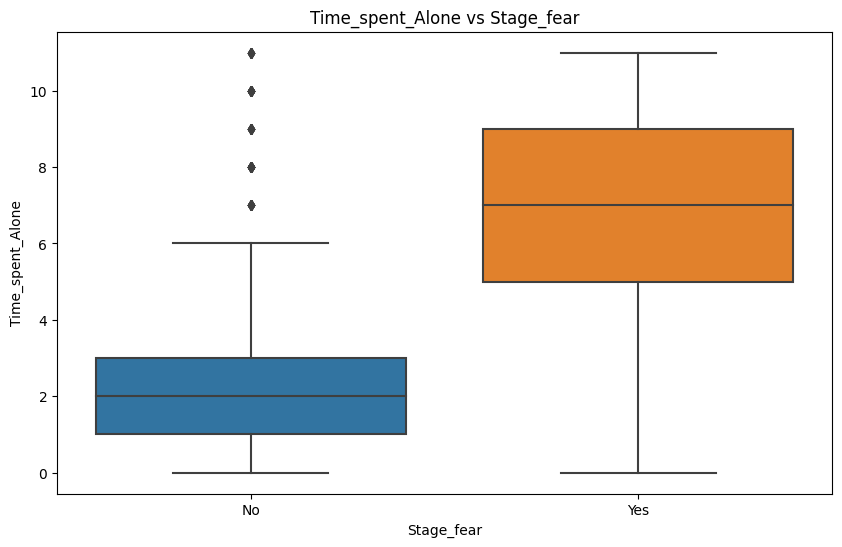

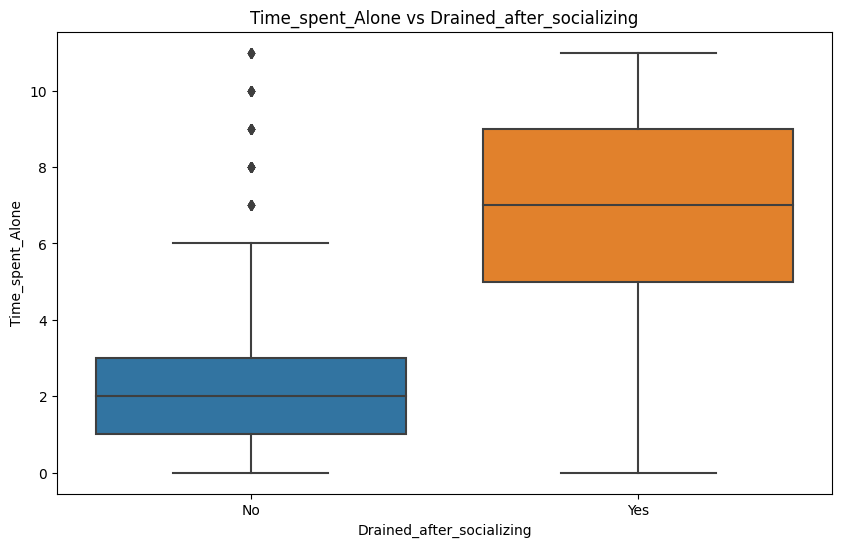

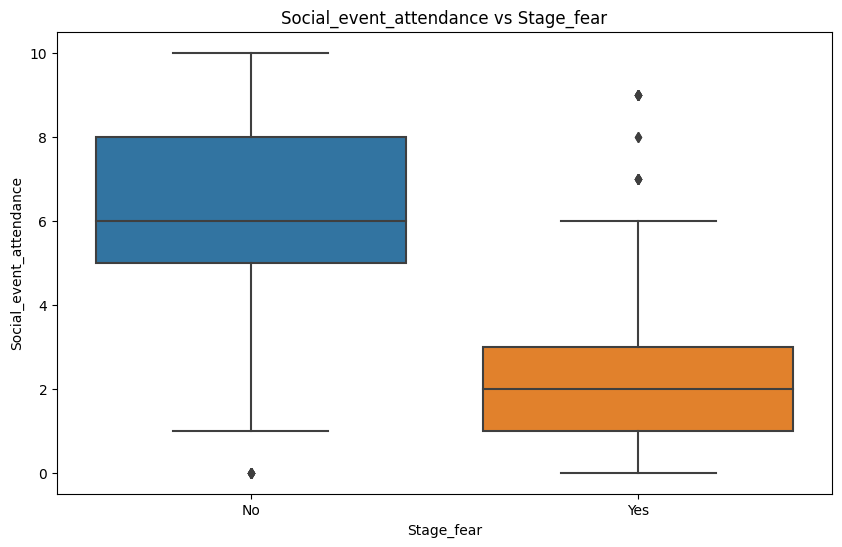

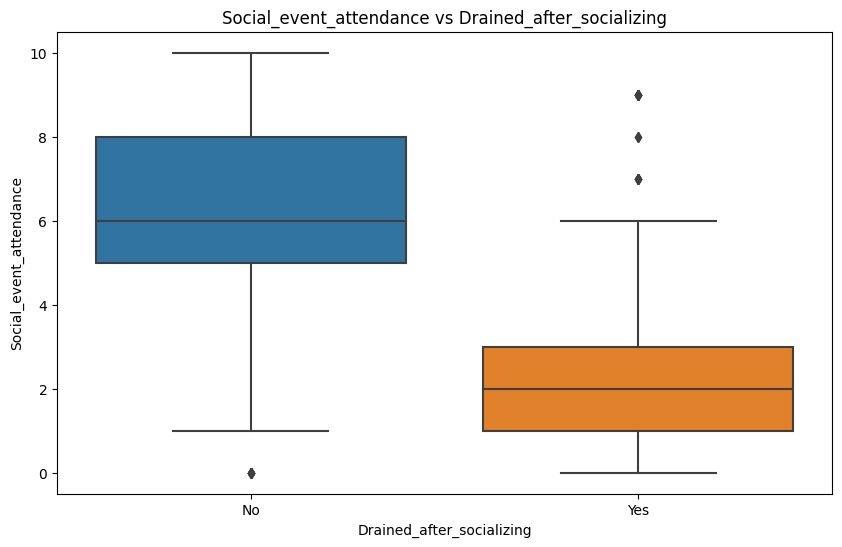

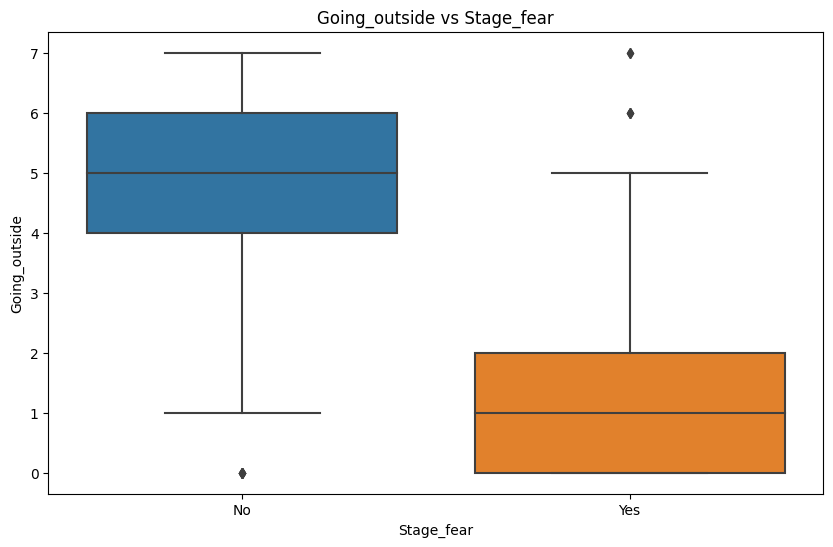

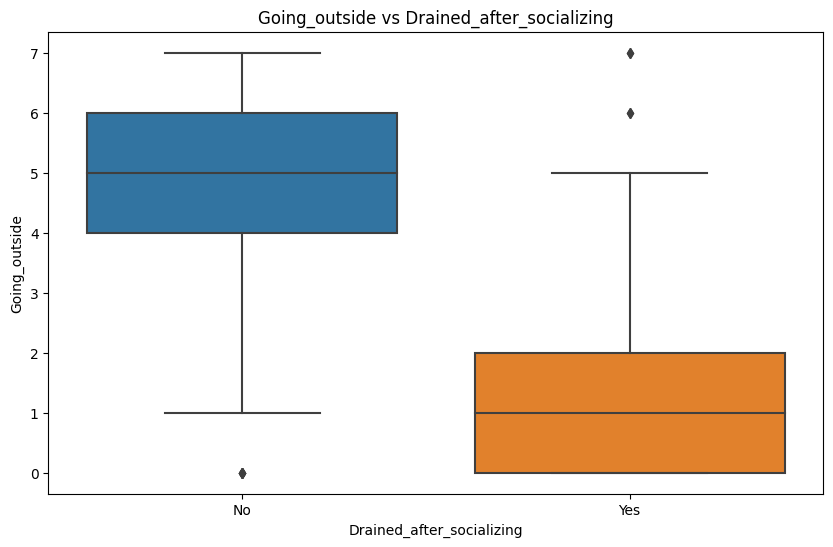

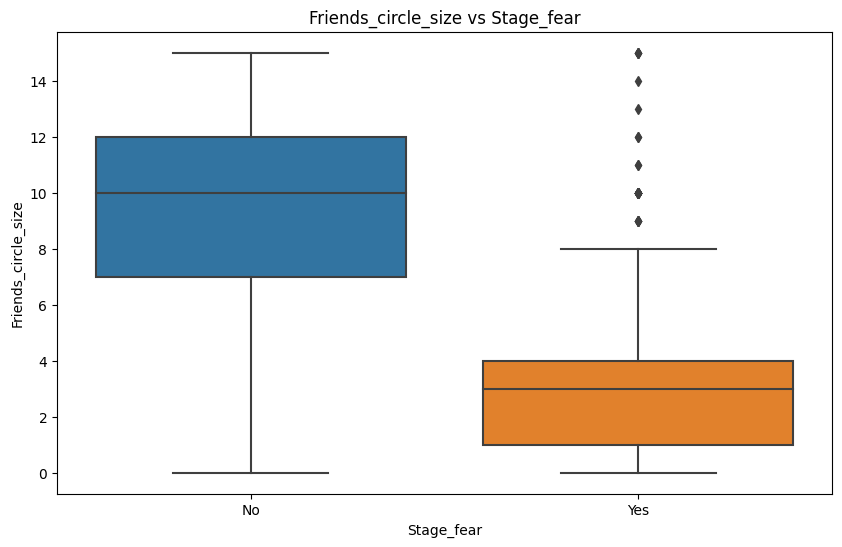

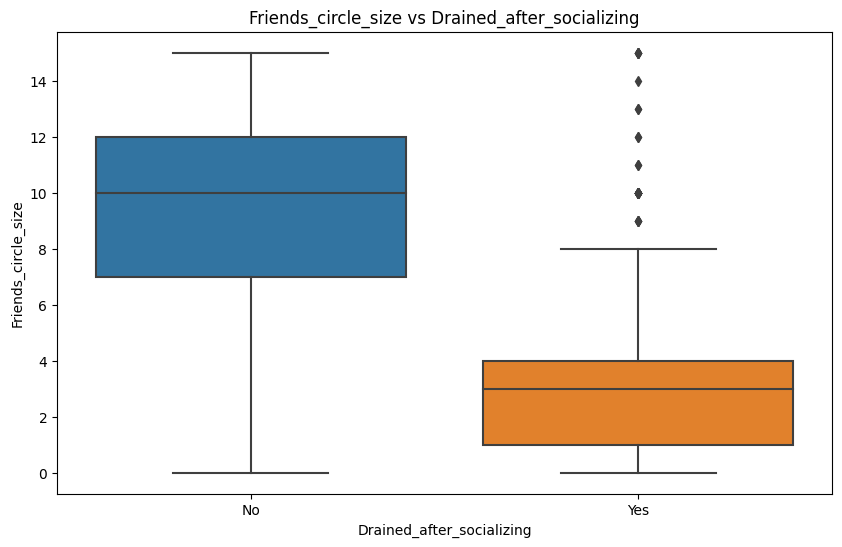

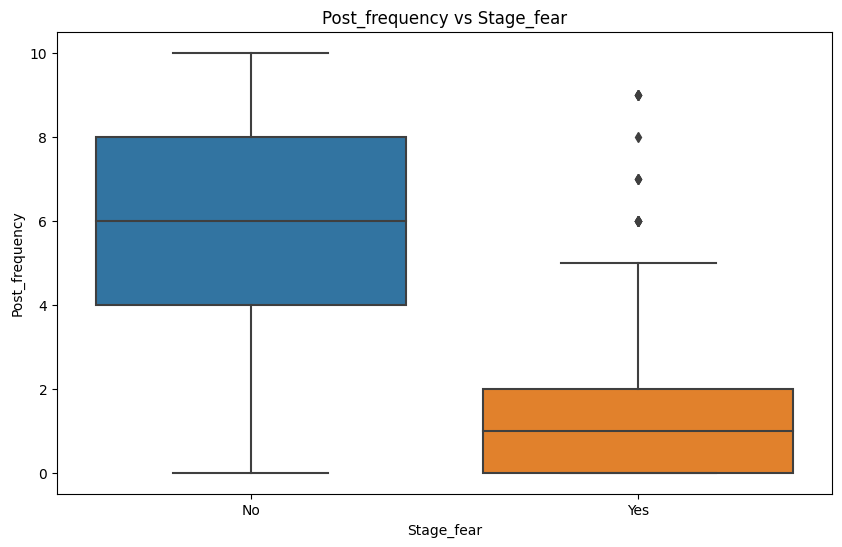

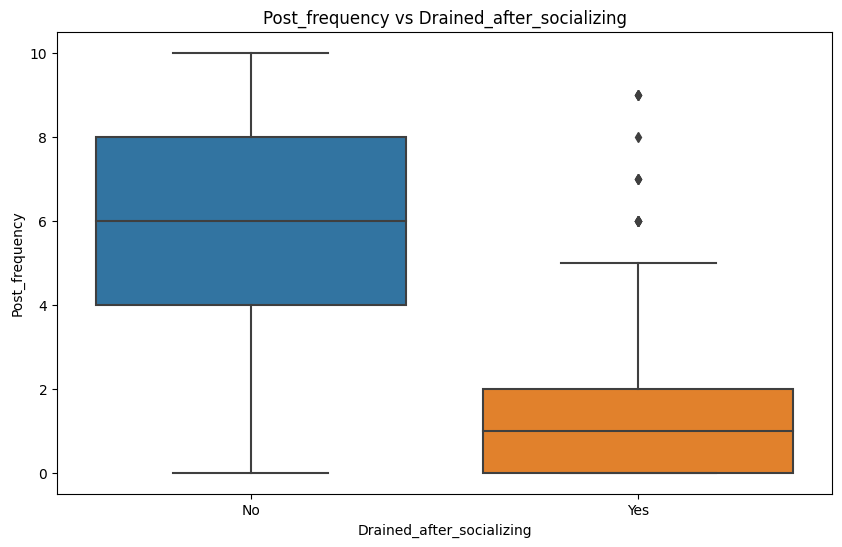

In [13]:
numerical_cols = df_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df_train.select_dtypes(include='object').columns.tolist()

# Exclude 'id' from numerical columns for plotting
if 'id' in numerical_cols:
    numerical_cols.remove('id')

# Exclude 'Personality' from categorical columns for plotting against other categoricals
if 'Personality' in categorical_cols:
    categorical_cols_for_plotting = categorical_cols.copy()
    categorical_cols_for_plotting.remove('Personality')
else:
    categorical_cols_for_plotting = categorical_cols.copy()


# Plot numerical features against 'Personality'
for num_col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_train, x='Personality', y=num_col)
    plt.title(f'{num_col} vs Personality')
    plt.xlabel('Personality')
    plt.ylabel(num_col)
    plt.show()

# Plot numerical features against other categorical features
for num_col in numerical_cols:
    for cat_col in categorical_cols_for_plotting:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df_train, x=cat_col, y=num_col)
        plt.title(f'{num_col} vs {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.show()

## Handle missing values

### Subtask:
Develop a strategy for handling missing values in both numerical and categorical columns.


**Reasoning**:
Identify columns with missing values and choose appropriate imputation strategies based on data types and distributions observed in previous EDA steps. Then, implement the chosen strategies for both training and testing datasets and verify that no missing values remain.



In [14]:
df_test=pd.read_csv('/kaggle/input/playground-series-s5e7/test.csv')
df_test.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [15]:
# Identify columns with missing values
missing_train = df_train.isnull().sum()
missing_train = missing_train[missing_train > 0]
print("Missing values in df_train:")
print(missing_train)

missing_test = df_test.isnull().sum()
missing_test = missing_test[missing_test > 0]
print("\nMissing values in df_test:")
print(missing_test)

numerical_cols_with_missing = missing_train[df_train[missing_train.index].dtypes != 'object'].index.tolist()
for col in numerical_cols_with_missing:
    median_val = df_train[col].median()
    df_train[col].fillna(median_val, inplace=True)
    df_test[col].fillna(median_val, inplace=True)

# Categorical columns: 'Stage_fear', 'Drained_after_socializing'
# Mode imputation is a common strategy for categorical data.
categorical_cols_with_missing = missing_train[df_train[missing_train.index].dtypes == 'object'].index.tolist()
for col in categorical_cols_with_missing:
    mode_val = df_train[col].mode()[0]
    df_train[col].fillna(mode_val, inplace=True)
    df_test[col].fillna(mode_val, inplace=True) # Impute test set with train set's mode

# Verify that there are no remaining missing values
print("\nMissing values in df_train after imputation:")
print(df_train.isnull().sum().sum())

print("\nMissing values in df_test after imputation:")
print(df_test.isnull().sum().sum())

Missing values in df_train:
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
dtype: int64

Missing values in df_test:
Time_spent_Alone             425
Stage_fear                   598
Social_event_attendance      397
Going_outside                466
Drained_after_socializing    432
Friends_circle_size          350
Post_frequency               408
dtype: int64

Missing values in df_train after imputation:
0

Missing values in df_test after imputation:
0


## Identify potential outliers

### Subtask:
Explore and visualize potential outliers in numerical features.


**Reasoning**:
Select numerical columns and create box plots for each to visualize potential outliers.



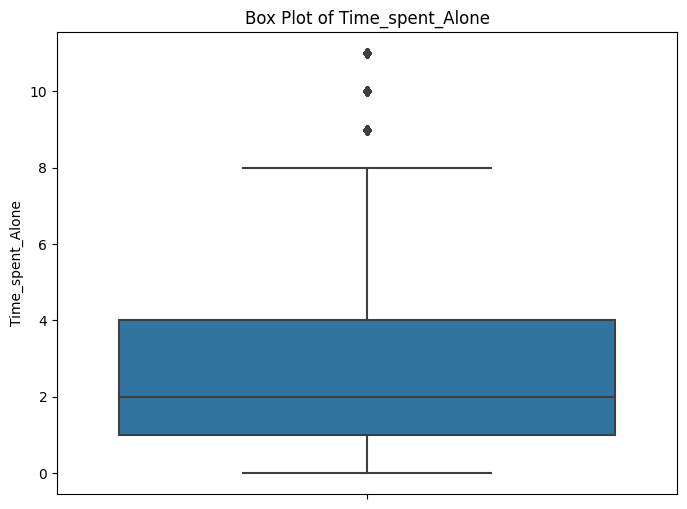

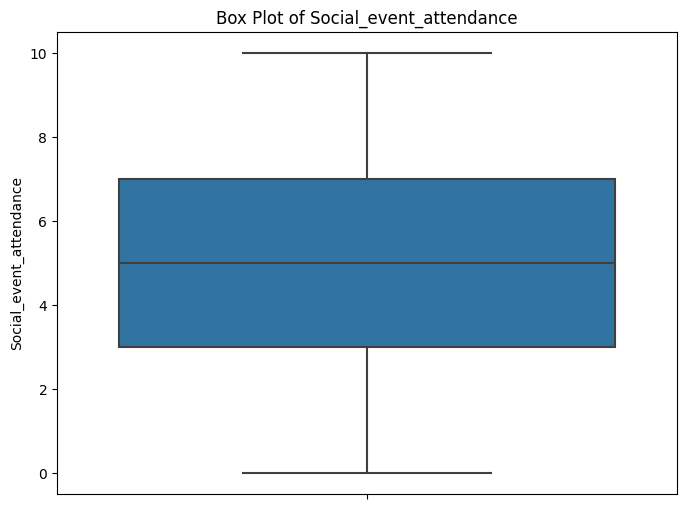

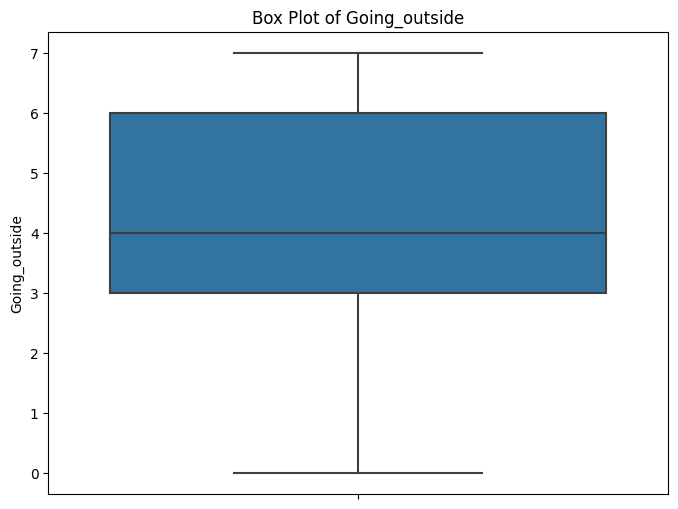

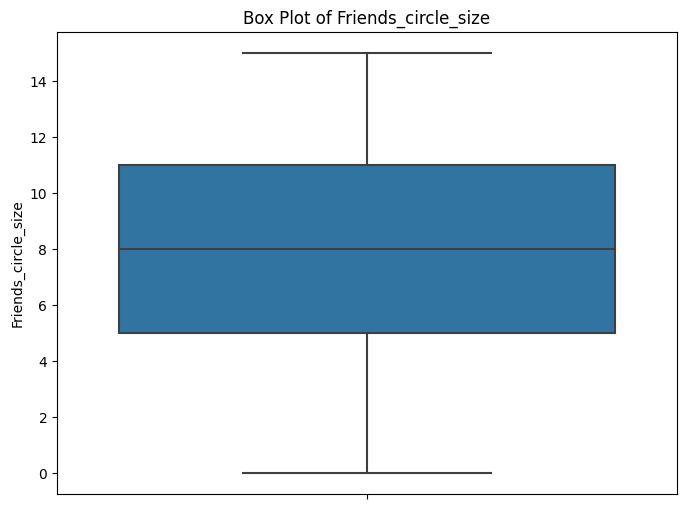

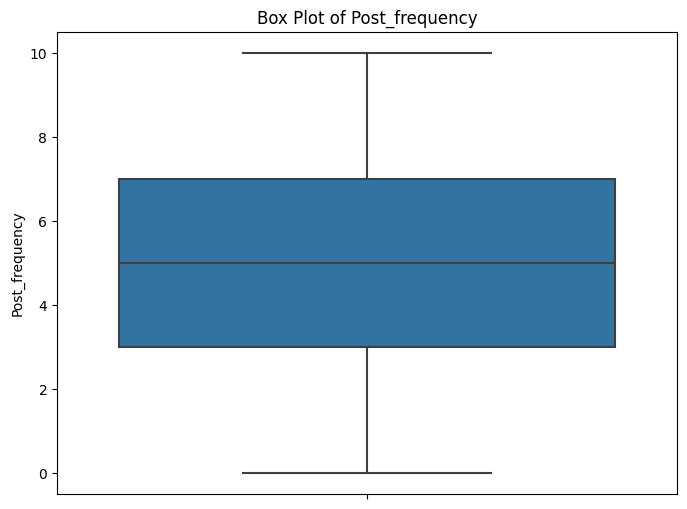

In [16]:
numerical_cols = df_train.select_dtypes(include=np.number).columns.tolist()
if 'id' in numerical_cols:
    numerical_cols.remove('id')

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df_train[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset contains three categorical features: 'Stage\_fear', 'Drained\_after\_socializing', and 'Personality'. 'Personality' is the target variable.
*   All categorical features are binary, with 'No' being the more frequent category for 'Stage\_fear' and 'Drained\_after\_socializing', and 'Extrovert' being more frequent for 'Personality'.
*   The visualizations show a relationship between 'Stage\_fear' and 'Drained\_after\_socializing' with the 'Personality' type. For instance, individuals who answered 'No' to 'Drained\_after\_socializing' appear more likely to be 'Extrovert'.
*   Box plots revealed the distribution of numerical features across different personality types and other categorical features. These plots also indicated the presence of potential outliers in several numerical columns.
*   Missing values were identified in both numerical and categorical columns of the training and testing datasets.
*   Median imputation was applied to handle missing values in numerical columns ('Time\_spent\_Alone', 'Social\_event\_attendance', 'Going\_outside', 'Friends\_circle\_size', 'Post\_frequency').
*   Mode imputation was applied to handle missing values in categorical columns ('Stage\_fear', 'Drained\_after\_socializing').
*   After imputation, both the training and testing datasets have no remaining missing values.

### Insights or Next Steps

*   Investigate the impact of the identified outliers in numerical features on model performance and consider appropriate handling strategies (e.g., transformation, capping, or removal).
*   Further explore the relationships between numerical features and the target variable 'Personality' using other visualization techniques or statistical tests to identify potential predictors.


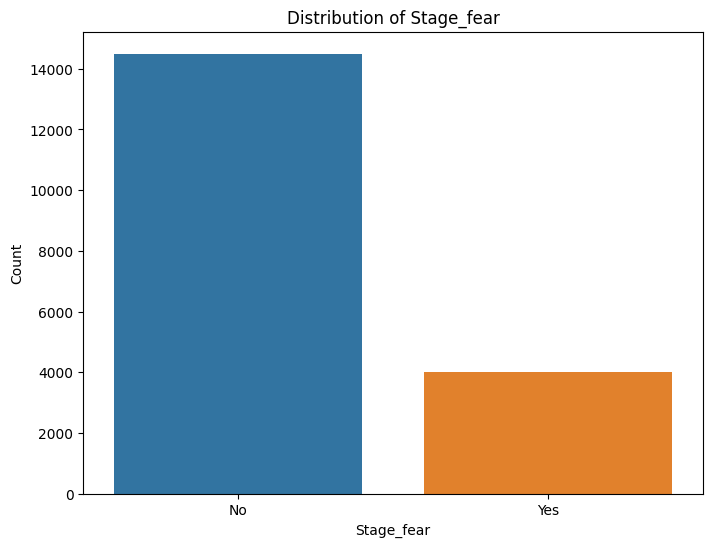

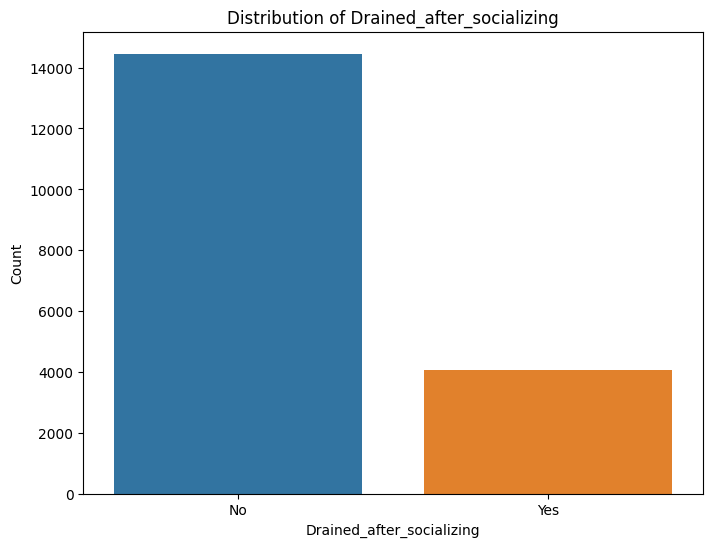

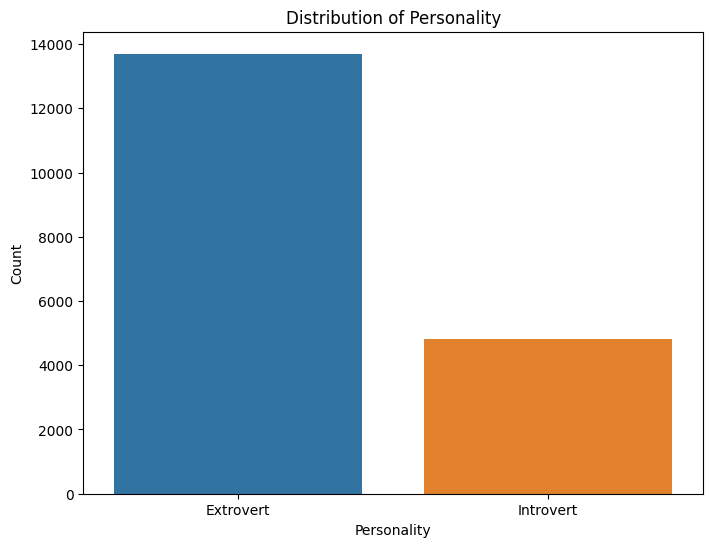

In [17]:
categorical_cols = df_train.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_train, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

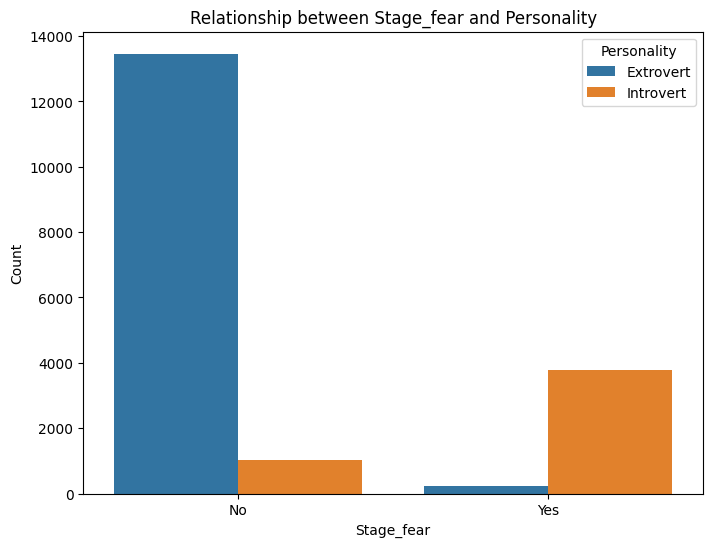

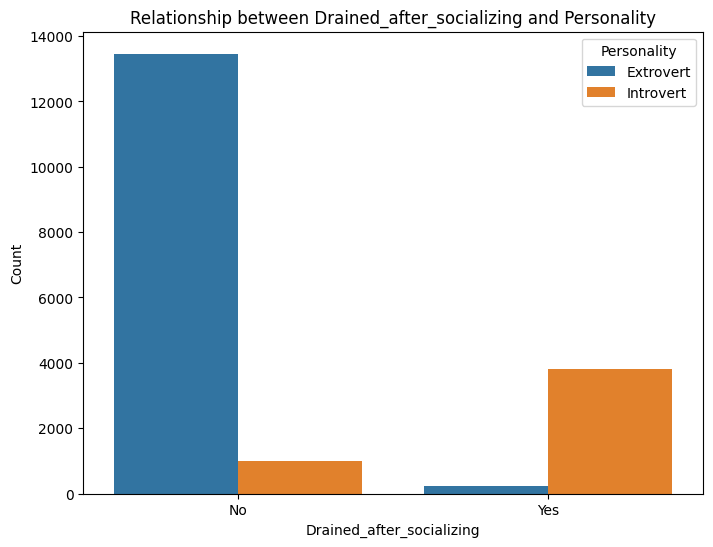

In [18]:
categorical_cols = df_train.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Personality')

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_train, x=col, hue='Personality')
    plt.title(f'Relationship between {col} and Personality')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Personality')
    plt.show()

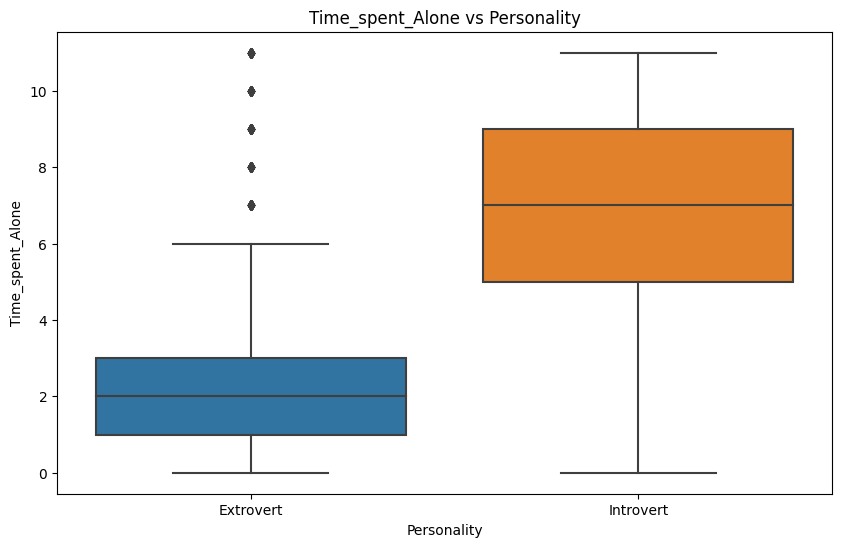

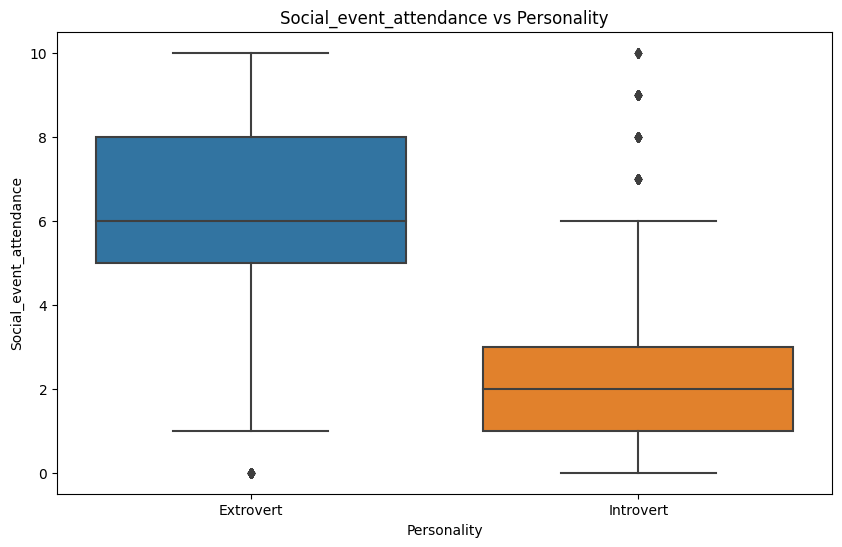

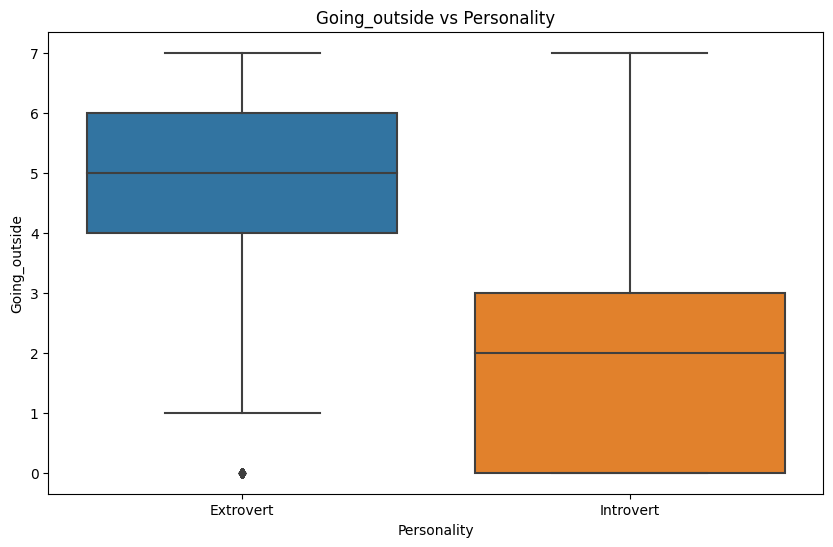

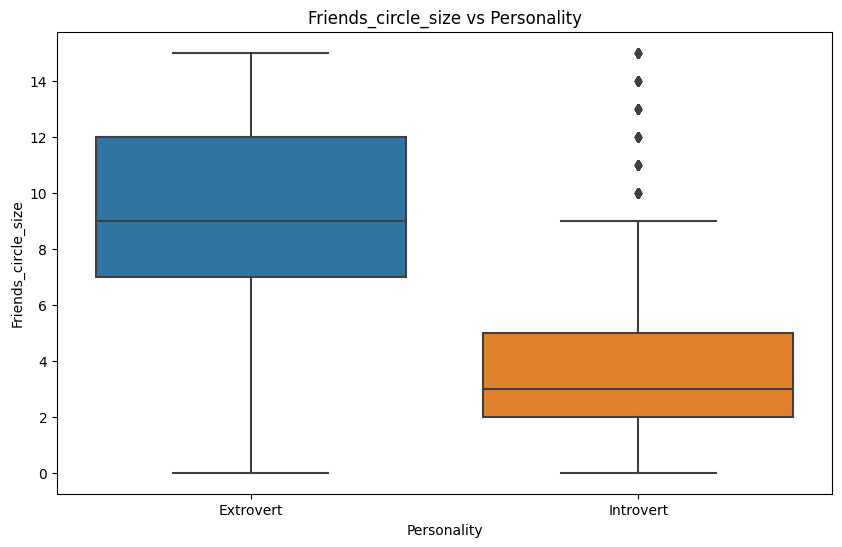

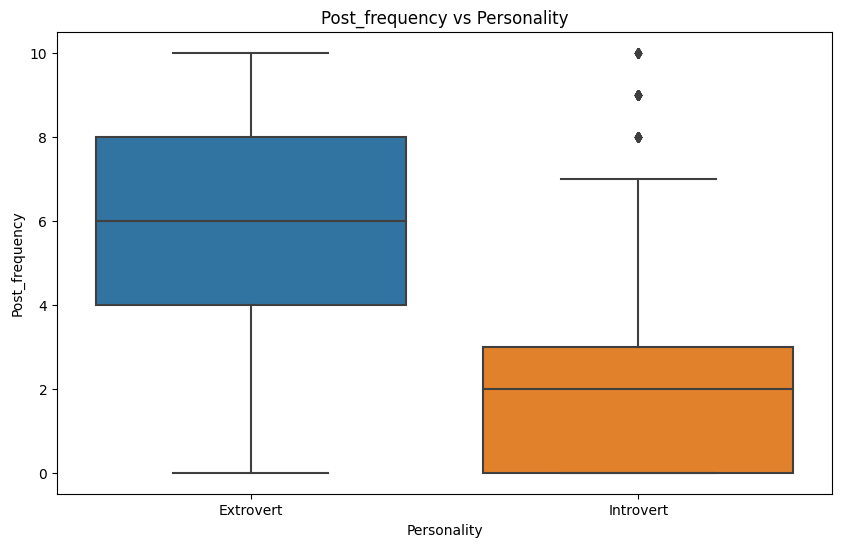

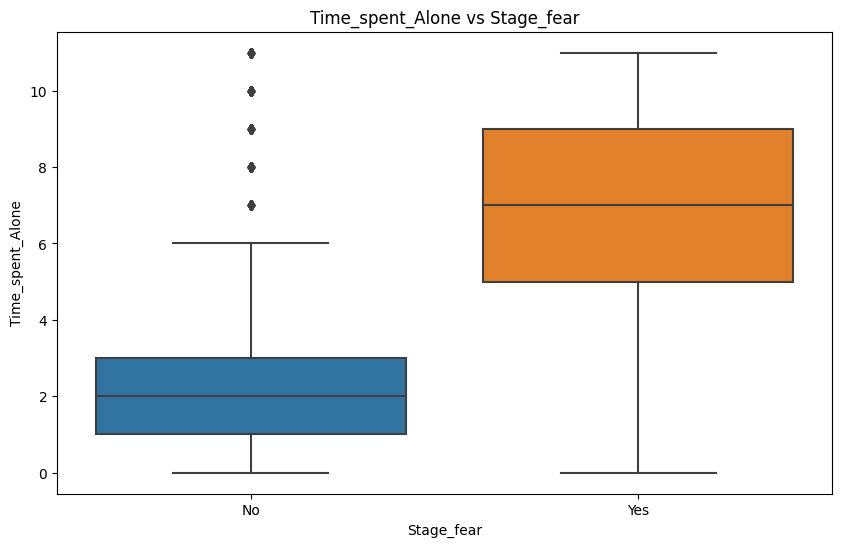

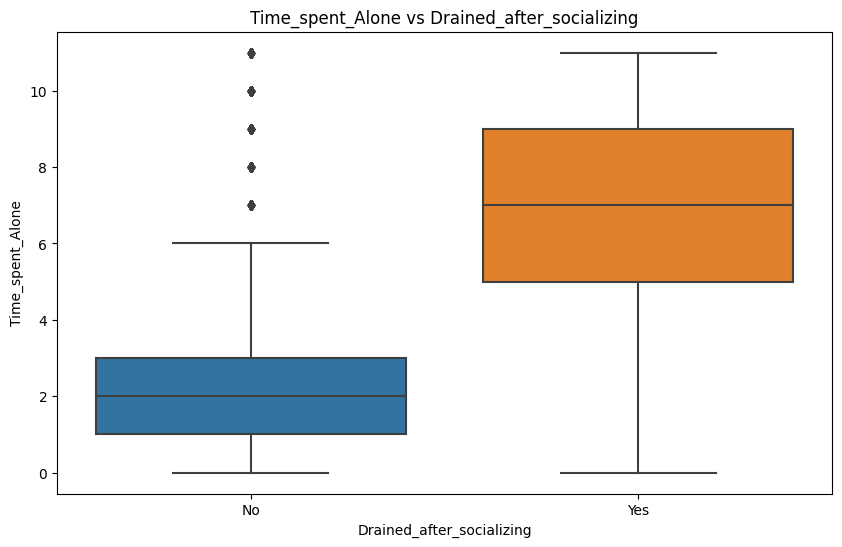

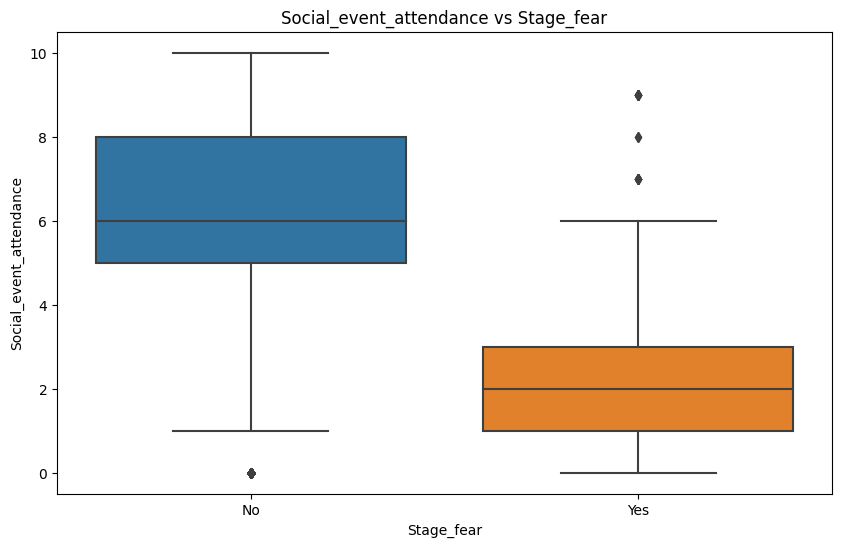

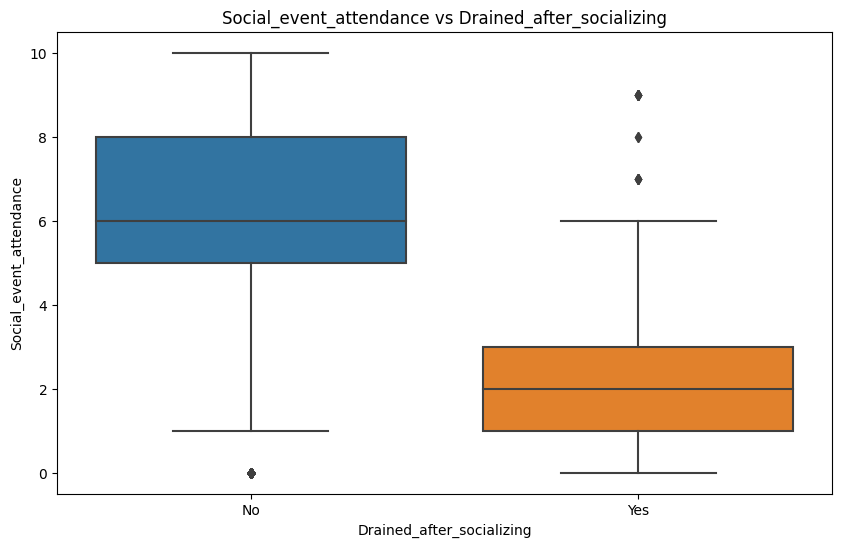

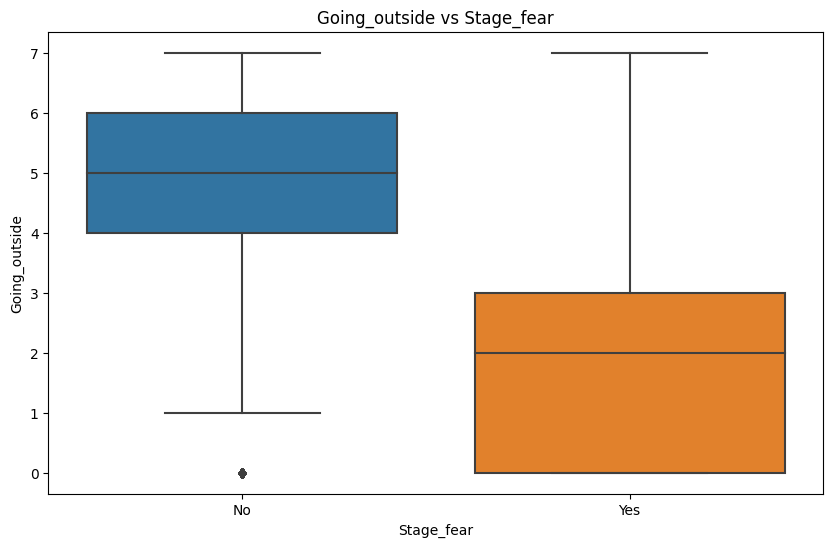

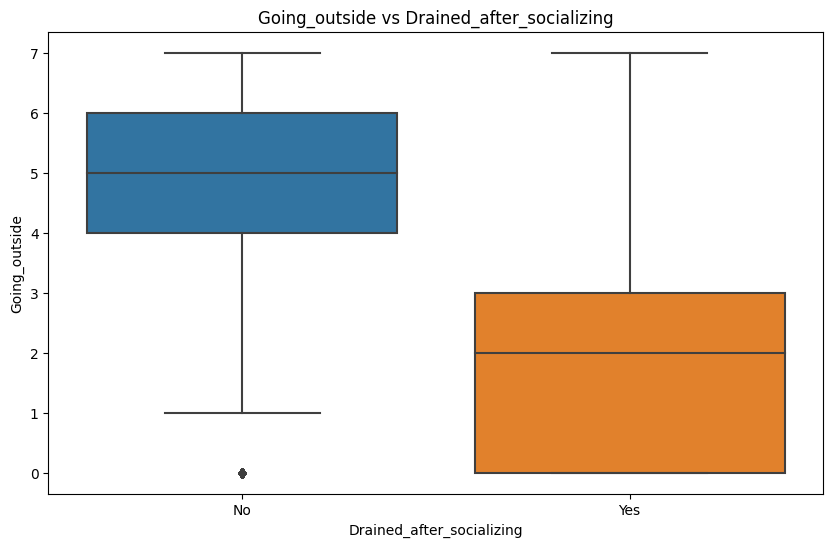

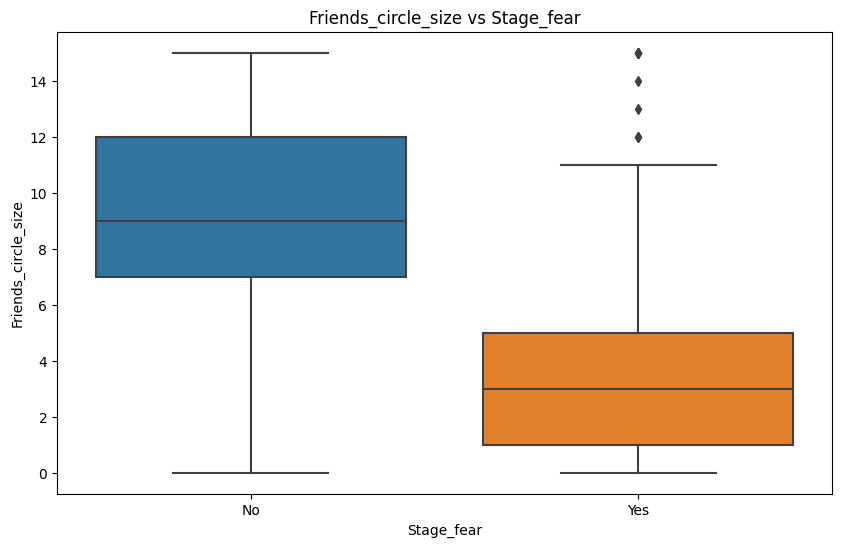

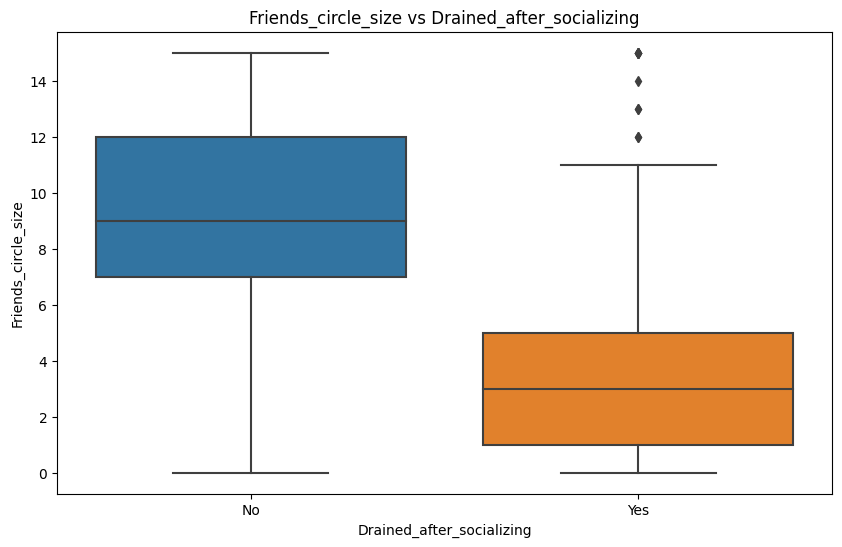

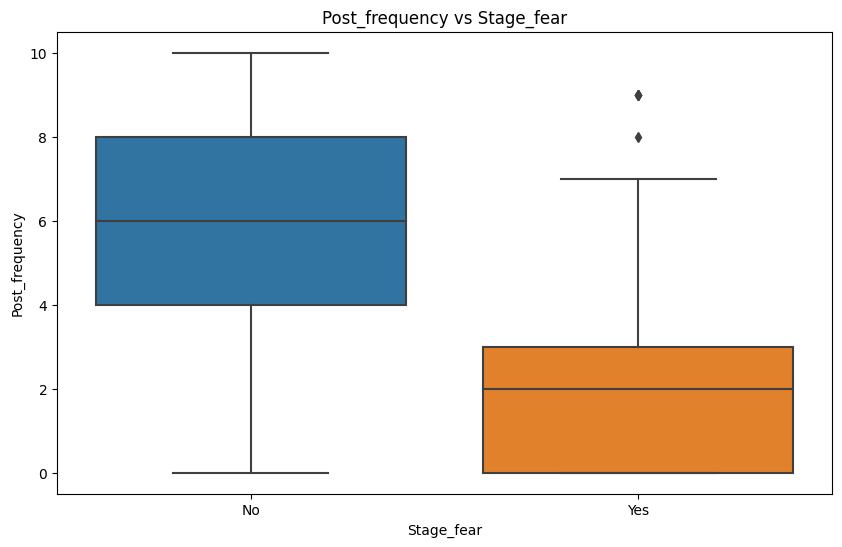

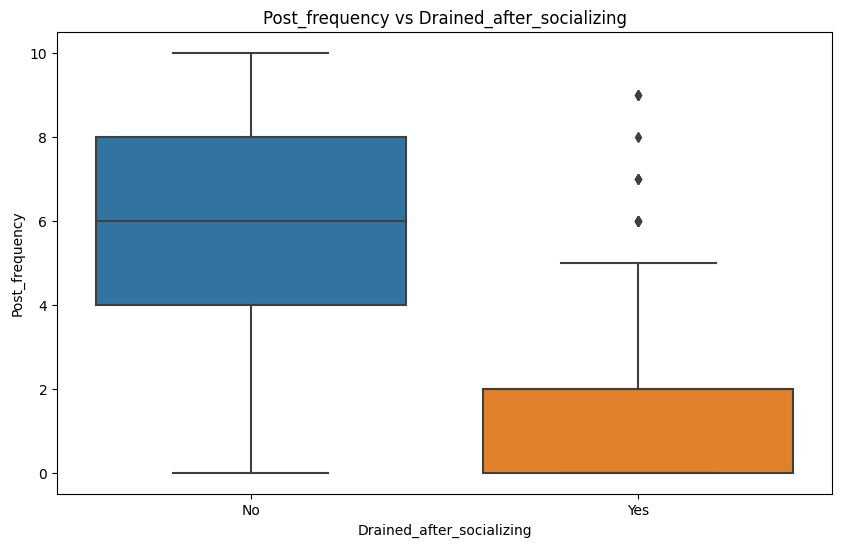

In [19]:
numerical_cols = df_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df_train.select_dtypes(include='object').columns.tolist()

# Exclude 'id' from numerical columns for plotting
if 'id' in numerical_cols:
    numerical_cols.remove('id')

# Exclude 'Personality' from categorical columns for plotting against other categoricals
if 'Personality' in categorical_cols:
    categorical_cols_for_plotting = categorical_cols.copy()
    categorical_cols_for_plotting.remove('Personality')
else:
    categorical_cols_for_plotting = categorical_cols.copy()


# Plot numerical features against 'Personality'
for num_col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_train, x='Personality', y=num_col)
    plt.title(f'{num_col} vs Personality')
    plt.xlabel('Personality')
    plt.ylabel(num_col)
    plt.show()

# Plot numerical features against other categorical features
for num_col in numerical_cols:
    for cat_col in categorical_cols_for_plotting:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df_train, x=cat_col, y=num_col)
        plt.title(f'{num_col} vs {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.show()

In [20]:
# Identify columns with missing values
missing_train = df_train.isnull().sum()
missing_train = missing_train[missing_train > 0]
print("Missing values in df_train:")
print(missing_train)

missing_test = df_test.isnull().sum()
missing_test = missing_test[missing_test > 0]
print("\nMissing values in df_test:")
print(missing_test)

# Imputation Strategy:
# Numerical columns: 'Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency'
# Based on the histograms, most numerical features appear somewhat skewed or have a concentration of values.
# Median imputation is a robust strategy for skewed data or data with outliers.
numerical_cols_with_missing = missing_train[df_train[missing_train.index].dtypes != 'object'].index.tolist()
for col in numerical_cols_with_missing:
    median_val = df_train[col].median()
    df_train[col].fillna(median_val, inplace=True)
    df_test[col].fillna(median_val, inplace=True) # Impute test set with train set's median

# Categorical columns: 'Stage_fear', 'Drained_after_socializing'
# Mode imputation is a common strategy for categorical data.
categorical_cols_with_missing = missing_train[df_train[missing_train.index].dtypes == 'object'].index.tolist()
for col in categorical_cols_with_missing:
    mode_val = df_train[col].mode()[0]
    df_train[col].fillna(mode_val, inplace=True)
    df_test[col].fillna(mode_val, inplace=True) # Impute test set with train set's mode

# Verify that there are no remaining missing values
print("\nMissing values in df_train after imputation:")
print(df_train.isnull().sum().sum())

print("\nMissing values in df_test after imputation:")
print(df_test.isnull().sum().sum())

Missing values in df_train:
Series([], dtype: int64)

Missing values in df_test:
Series([], dtype: int64)

Missing values in df_train after imputation:
0

Missing values in df_test after imputation:
0


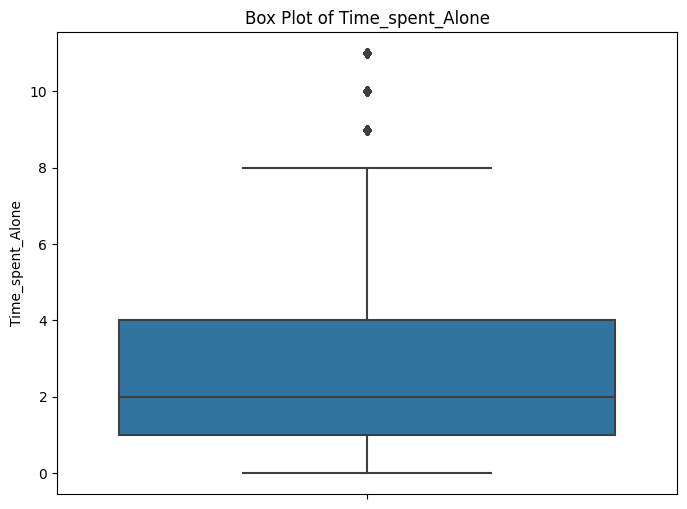

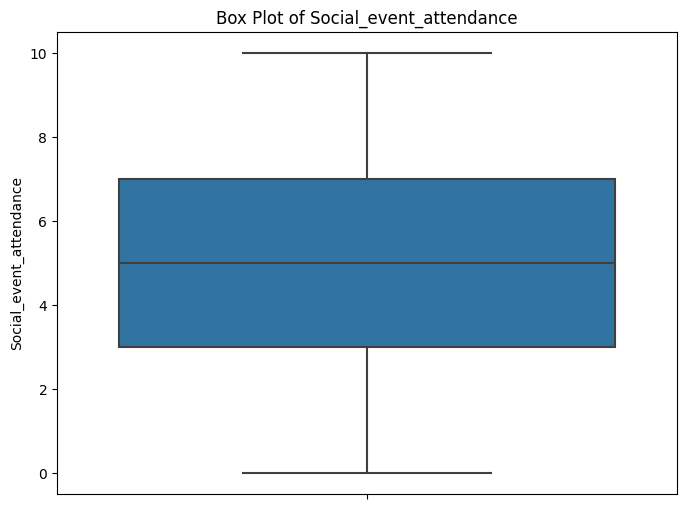

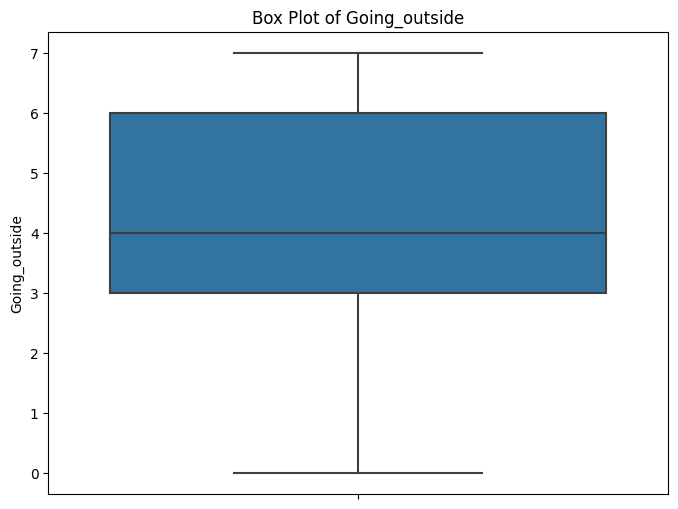

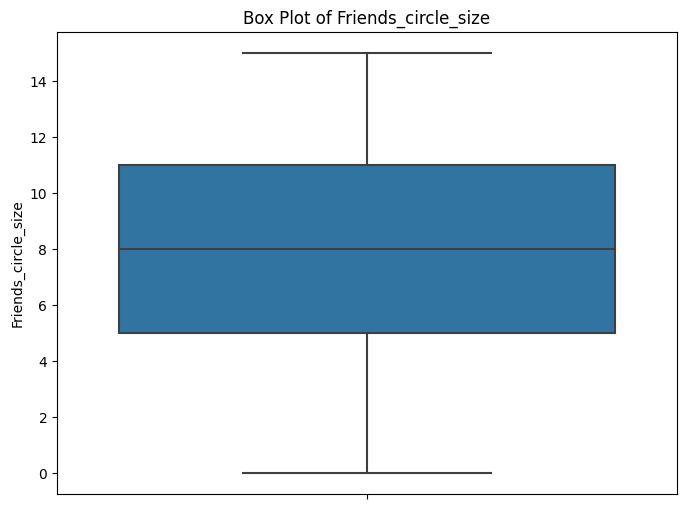

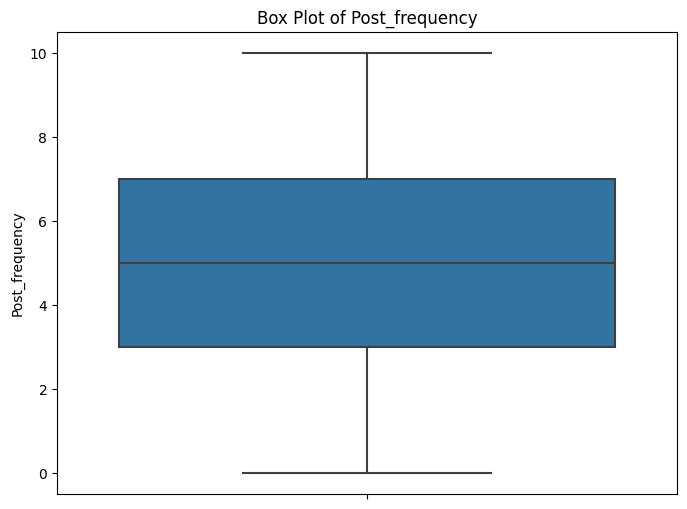

In [21]:
numerical_cols = df_train.select_dtypes(include=np.number).columns.tolist()
if 'id' in numerical_cols:
    numerical_cols.remove('id')

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df_train[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

## Summary:

### Data Analysis Key Findings

* The dataset contains three categorical features: 'Stage\_fear', 'Drained\_after\_socializing', and 'Personality'. 'Personality' is the target variable.
* All categorical features are binary, with 'No' being the more frequent category for 'Stage\_fear' and 'Drained\_after\_socializing', and 'Extrovert' being more frequent for 'Personality'.
* The visualizations show a relationship between 'Stage\_fear' and 'Drained\_after\_socializing' with the 'Personality' type. For instance, individuals who answered 'No' to 'Drained\_after\_socializing' appear more likely to be 'Extrovert'.
* Box plots revealed the distribution of numerical features across different personality types and other categorical features. These plots also indicated the presence of potential outliers in several numerical columns.
* Missing values were identified in both numerical and categorical columns of the training and testing datasets.
* Median imputation was applied to handle missing values in numerical columns ('Time\_spent\_Alone', 'Social\_event\_attendance', 'Going\_outside', 'Friends\_circle\_size', 'Post\_frequency').
* Mode imputation was applied to handle missing values in categorical columns ('Stage\_fear', 'Drained\_after\_socializing').
* After imputation, both the training and testing datasets have no remaining missing values.

### Insights or Next Steps

* Investigate the impact of the identified outliers in numerical features on model performance and consider appropriate handling strategies (e.g., transformation, capping, or removal).
* Further explore the relationships between numerical features and the target variable 'Personality' using other visualization techniques or statistical tests to identify potential predictors.

## Feature engineering

### Subtask:
Create new features or transform existing ones to improve model performance. This could include one-hot encoding categorical variables, scaling numerical features, or creating interaction terms.


**Reasoning**:
Identify categorical and numerical columns, apply one-hot encoding to categorical features, and apply standard scaling to numerical features, then concatenate the results.



In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target variable from the training data
X_train = df_train.drop(['id', 'Personality'], axis=1)
y_train = df_train['Personality']
X_test = df_test.drop('id', axis=1)

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include='object').columns
numerical_cols = X_train.select_dtypes(include=np.number).columns

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Create a preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the training data
X_train_processed = preprocessing_pipeline.fit_transform(X_train)

# Transform the testing data
X_test_processed = preprocessing_pipeline.transform(X_test)

# Convert processed data back to DataFrames for easier handling (optional but good for inspection)
# Get feature names after one-hot encoding
feature_names = preprocessing_pipeline.named_steps['preprocessor'].get_feature_names_out()

X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names)

display(X_train_processed_df.head())
display(X_test_processed_df.head())

,num__Time_spent_Alone,num__Social_event_attendance,num__Going_outside,num__Friends_circle_size,num__Post_frequency,cat__Stage_fear_No,cat__Stage_fear_Yes,cat__Drained_after_socializing_No,cat__Drained_after_socializing_Yes
0,-1.049913,0.282102,-0.020620,1.707463,0.006002,1.0,0.0,1.0,0.0
1,-0.707327,0.657346,-0.525859,0.488383,1.085490,1.0,0.0,1.0,0.0
2,1.005601,-1.594120,-2.041578,-1.218331,-1.793144,0.0,1.0,1.0,0.0
3,-0.022156,0.657346,-0.525859,0.732199,0.006002,1.0,0.0,1.0,0.0
4,-0.707327,-0.468387,-0.020620,1.219831,0.006002,1.0,0.0,1.0,0.0


,num__Time_spent_Alone,num__Social_event_attendance,num__Going_outside,num__Friends_circle_size,num__Post_frequency,cat__Stage_fear_No,cat__Stage_fear_Yes,cat__Drained_after_socializing_No,cat__Drained_after_socializing_Yes
0,-0.022156,0.657346,-0.020620,-0.486882,0.006002,1.0,0.0,1.0,0.0
1,-0.364742,-1.969365,-2.041578,-0.730698,-1.433314,0.0,1.0,0.0,1.0
2,-0.022156,-0.093143,0.989859,1.707463,1.445319,1.0,0.0,1.0,0.0
3,-0.022156,-0.468387,-0.020620,-0.730698,0.365832,1.0,0.0,1.0,0.0
4,2.033358,-1.594120,-1.031099,-1.705963,-1.433314,0.0,1.0,0.0,1.0


## Model selection and training

### Subtask:
Choose an appropriate model for the classification task and train it on the prepared data.


**Reasoning**:
Import a classification model, instantiate it, and train it on the processed data.



In [23]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_processed_df, y_train)

RandomForestClassifier(random_state=42)

## Model evaluation

### Subtask:
Evaluate the trained model using appropriate metrics.


**Reasoning**:
Calculate and print the evaluation metrics for the trained model on the training data.



In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_train_pred = model.predict(X_train_processed_df)

accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred, pos_label='Extrovert')
recall = recall_score(y_train, y_train_pred, pos_label='Extrovert')
f1 = f1_score(y_train, y_train_pred, pos_label='Extrovert')

print(f"Training Accuracy: {accuracy:.4f}")
print(f"Training Precision: {precision:.4f}")
print(f"Training Recall: {recall:.4f}")
print(f"Training F1-score: {f1:.4f}")

Training Accuracy: 0.9937
Training Precision: 0.9925
Training Recall: 0.9990
Training F1-score: 0.9957


## Prediction

### Subtask:
Make predictions on the test set.


**Reasoning**:
Use the trained model to make predictions on the processed test data.



In [25]:
test_predictions = model.predict(X_test_processed_df)

## Submission file generation

### Subtask:
Create a submission file in the specified format.


**Reasoning**:
Create the submission DataFrame with 'id' from the test set and the predicted 'Personality' labels, then save it to a CSV file.



In [26]:
# Create the submission DataFrame
submission_df = pd.DataFrame({'id': df_test['id'], 'Personality': test_predictions})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

display(submission_df.head())

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert


## Summary:

### Data Analysis Key Findings

*   Numerical features were scaled using `StandardScaler`, and categorical features were one-hot encoded using `OneHotEncoder` for both the training and testing datasets.
*   A `RandomForestClassifier` was selected and trained on the processed training data.
*   The trained model achieved high evaluation metrics on the training data: Accuracy: 0.9937, Precision: 0.9925, Recall: 0.9990, and F1-score: 0.9957.
*   Predictions were successfully generated for the test dataset.
*   A submission file named `submission.csv` was created containing the test set IDs and their corresponding predicted personality types.

### Insights or Next Steps

*   The high performance metrics on the training data suggest potential overfitting. Evaluating the model on a separate validation set or using cross-validation is crucial to get a more reliable estimate of the model's generalization performance.
*   Further hyperparameter tuning of the `RandomForestClassifier` could potentially improve performance on unseen data, especially if the current high training scores are due to overfitting.


## Model Evaluation with Cross-Validation

### Subtask:
Evaluate the trained model using cross-validation to get a more reliable performance estimate.

**Reasoning**:
Import the necessary cross-validation tools, define the cross-validation strategy, and evaluate the model using appropriate metrics.

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target variable from the training data
X_train = df_train.drop(['id', 'Personality'], axis=1)
y_train = df_train['Personality']

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include='object').columns
numerical_cols = X_train.select_dtypes(include=np.number).columns

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Create a preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the training data
X_train_processed = preprocessing_pipeline.fit_transform(X_train)

# Convert processed data back to DataFrames for easier handling (optional but good for inspection)
# Get feature names after one-hot encoding
feature_names = preprocessing_pipeline.named_steps['preprocessor'].get_feature_names_out()

X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)


# Instantiate the model
model = RandomForestClassifier(random_state=42)

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, pos_label='Extrovert'),
    'recall': make_scorer(recall_score, pos_label='Extrovert'),
    'f1': make_scorer(f1_score, pos_label='Extrovert')
}

# Perform cross-validation
cv_results = cross_val_score(model, X_train_processed_df, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation Accuracy: {cv_results.mean():.4f} (+/- {cv_results.std():.4f})")

# You can also perform cross-validation for other metrics similarly
cv_precision = cross_val_score(model, X_train_processed_df, y_train, cv=5, scoring=scoring['precision'])
cv_recall = cross_val_score(model, X_train_processed_df, y_train, cv=5, scoring=scoring['recall'])
cv_f1 = cross_val_score(model, X_train_processed_df, y_train, cv=5, scoring=scoring['f1'])

print(f"Cross-validation Precision: {cv_precision.mean():.4f} (+/- {cv_precision.std():.4f})")
print(f"Cross-validation Recall: {cv_recall.mean():.4f} (+/- {cv_recall.std():.4f})")
print(f"Cross-validation F1-score: {cv_f1.mean():.4f} (+/- {cv_f1.std():.4f})")

Cross-validation Accuracy: 0.9637 (+/- 0.0047)
Cross-validation Precision: 0.9763 (+/- 0.0029)
Cross-validation Recall: 0.9746 (+/- 0.0054)
Cross-validation F1-score: 0.9754 (+/- 0.0032)


In [28]:
# Train the model on the entire training data (after cross-validation)
model.fit(X_train_processed_df, y_train)

# Separate features from the test data
X_test = df_test.drop('id', axis=1)

# Transform the test data using the same preprocessor fitted on the training data
X_test_processed = preprocessing_pipeline.transform(X_test)

# Convert processed test data back to DataFrame
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names)


# Make predictions on the test set
test_predictions = model.predict(X_test_processed_df)

# Create the submission DataFrame
submission_df = pd.DataFrame({'id': df_test['id'], 'Personality': test_predictions})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

# Display the first few rows of the submission file
display(submission_df.head())

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert
